In [95]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams["figure.figsize"] = (12, 7)
pd.set_option('display.max_columns', None)

sns.set_style("darkgrid")
%matplotlib inline

In [96]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import warnings
warnings.filterwarnings('ignore')

In [97]:
#loading dataset
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")
store_df = pd.read_csv("../data/store.csv")

###### To check dataset columns

In [98]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [99]:
test_df.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [100]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

#### Information about Dataset

In [101]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [102]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [103]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Data Preporcessing
1.Check and Handle Missing Values in Training Dataset

In [108]:
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

GReat !!. We don't have any null values on train dataset.

##### 2.  Check and Handle Missing Values in Testing Dataset

In [105]:
test_df.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

All columns except Open are all missing value free. Open column have very small number of missing values. Let's look more on to it.

In [110]:
test_df[pd.isnull(df_test['Open'])]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday


In [111]:
# handling missing values
test_df = cleaner.fix_missing_ffill(df_test, ['Open']) 

#### 3. Check and Handle Missing Values in Store Dataset

In [112]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

 We have six columns with missing values. From the six, CompetitionDistance has small number of null percentage which can be handled with median.

In [114]:
# Handle missing values in CompetitionDistance with mean or median based on the skewness
store_df = cleaner.fill_numerical_columns(store_df, ['CompetitionDistance'])

In [115]:
# numeric columns with missing values
print(np.sort(store_df['CompetitionOpenSinceMonth'].unique()))
print(np.sort(store_df['CompetitionOpenSinceYear'].unique()))
print(np.sort(store_df['Promo2SinceWeek'].unique()))
print(np.sort(store_df['Promo2SinceYear'].unique()))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. nan]
[1900. 1961. 1990. 1994. 1995. 1998. 1999. 2000. 2001. 2002. 2003. 2004.
 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]
[ 1.  5.  6.  9. 10. 13. 14. 18. 22. 23. 26. 27. 28. 31. 35. 36. 37. 39.
 40. 44. 45. 48. 49. 50. nan]
[2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]


In [116]:
#categorical columns with missing values
store_df['PromoInterval'].unique().tolist()

[nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec']

In [117]:
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(1)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(1990)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)

In [118]:
# Replace the PromoInterval missing values with 0

store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)

In [119]:
store_df.loc[store_df['PromoInterval'] == 'Jan,Apr,Jul,Oct', 'PromoInterval'] = 1
store_df.loc[store_df['PromoInterval'] == 'Feb,May,Aug,Nov', 'PromoInterval'] = 2
store_df.loc[store_df['PromoInterval'] == 'Mar,Jun,Sept,Dec', 'PromoInterval'] = 3

In [120]:
store_df['PromoInterval'].unique().tolist()

[0, 1, 2, 3]

##### To check Outliers

In [121]:
columns = ['Sales', 'Customers']
df_outliers = DfOutlier(train_df[columns].copy())
df_outliers.getOverview()

,number_of_outliers,percentage_of_outliers,skew,Q1,Median,Q3
label,,,,,,
Sales,26694,2.62%,0.641,3727.000,5744.000,7856.000
Customers,38095,3.75%,1.599,405.000,609.000,837.000


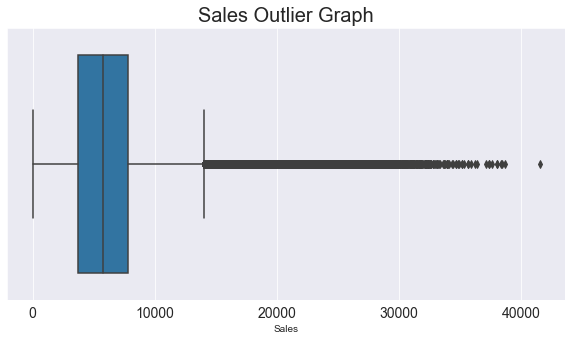

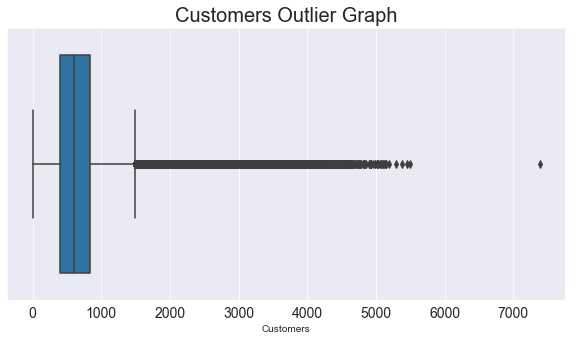

In [122]:
plot.box_plot(train_df, train_df['Sales'], "Sales Outlier Graph") 
plot.box_plot(train_df, train_df['Customers'], "Customers Outlier Graph")

In [123]:
df_outliers = DfOutlier(train_df)
df_outliers.replace_outliers_with_iqr(['Sales', 'Customers'])

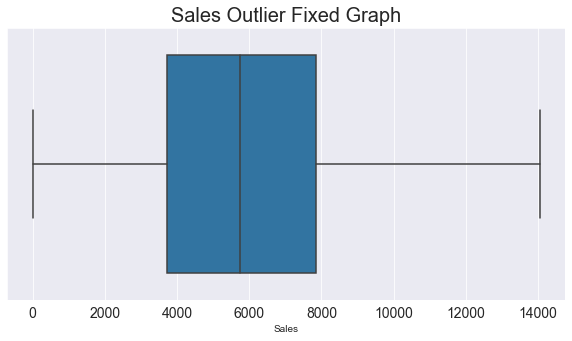

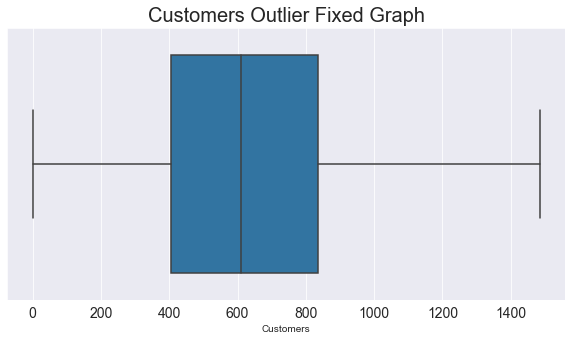

In [77]:
plot.box_plot(train_df, train_df['Sales'], "Sales Outlier Fixed Graph") 
plot.box_plot(train_df, train_df['Customers'], "Customers Outlier Fixed Graph")

figure above shows after outlier was removed

In [124]:
df_outliers = DfOutlier(store_df[['CompetitionDistance']].copy())
df_outliers.getOverview()

,number_of_outliers,percentage_of_outliers,skew,Q1,Median,Q3
label,,,,,,
CompetitionDistance,108,9.69%,2.934,720.000,2325.000,6875.000


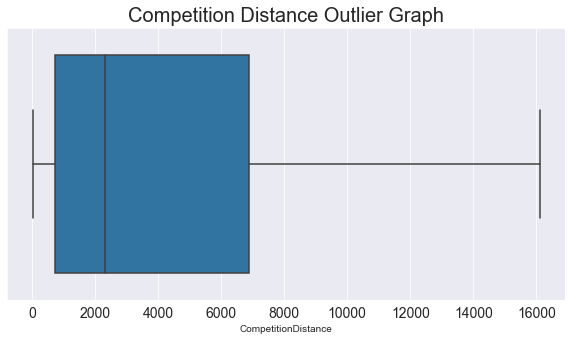

In [79]:
plot.box_plot(store_df, store_df['CompetitionDistance'], "Competition Distance Outlier Graph") 

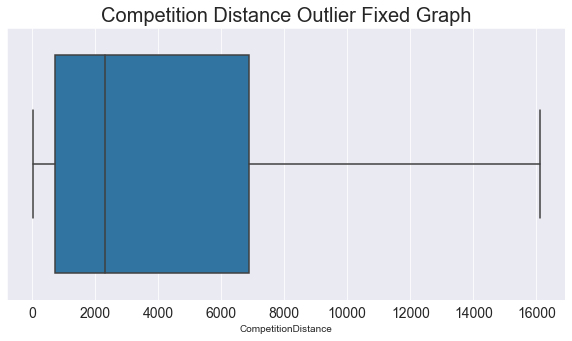

In [125]:
df_outliers = DfOutlier(store_df)
df_outliers.replace_outliers_with_iqr(['CompetitionDistance'])
plot.box_plot(store_df, store_df['CompetitionDistance'], "Competition Distance Outlier Fixed Graph") 

In [126]:
# Set Date data type to DateTime

train_df = cleaner.convert_to_datetime(train_df, ['Date'])
test_df = cleaner.convert_to_datetime(test_df, ['Date'])

In [127]:
no_uniqueValues = train_df.nunique(dropna=False)
no_uniqueValues

Store             1115
DayOfWeek            7
Date               942
Sales            13195
Customers         1424
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [128]:
print(train_df['DayOfWeek'].unique())
print(train_df['StateHoliday'].unique())


[5 4 3 2 1 7 6]
['0' 'a' 'b' 'c' 0]


In [129]:
# Convert 0 in StateHoliday to string
train_df["StateHoliday"].loc[train_df["StateHoliday"] == 0] = "0" 
train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [132]:
chars = ['0',"a", "b", "c"]
train_df['StateHoliday'] = train_df['StateHoliday'].apply(lambda x: chars.index(x))
test_df['StateHoliday'] = test_df['StateHoliday'].apply(lambda x: chars.index(x))

ValueError: 0 is not in list

In [86]:
no_uniqueValues = df_store.nunique(dropna=False)
no_uniqueValues

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           556
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                25
Promo2SinceYear                23
PromoInterval                   4
dtype: int64

In [91]:
print(store_df['StoreType'].unique())
print(store_df['Assortment'].unique() )

[2 0 3 1]
[0 2 1]


In [133]:
# Convert 0 in StateHoliday to string
df_train["StateHoliday"].loc[df_train["StateHoliday"] == 0] = "0" 
df_train['StateHoliday'].unique()

array(['0', 1, 2, 3], dtype=object)

In [134]:
# Convert store name characters to numbers

chars = ["a", "b", "c", "d"]
store_df['StoreType'] = store_df['StoreType'].apply(lambda x: chars.index(x))
store_df['Assortment'] = store_df['Assortment'].apply(lambda x: chars.index(x))

In [135]:
store_df = cleaner.convert_to_integer(store_df, ['StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear'])
train_df = cleaner.convert_to_integer(train_df, ['StateHoliday', 'SchoolHoliday', 'Customers', 'Sales', 'Open'])
test_df = cleaner.convert_to_integer(test_df, ['StateHoliday', 'SchoolHoliday', 'Open'])

In [ ]:
store_df.to_csv(store_df, '../data/cleaned_store.csv')
train_df.to_csv(train_df, '../data/cleaned_train.csv')
test_df.to_csv(test_df, '../data/cleaned_test.csv')